### <div align="center">Transformers</div>

#### 12.2, 12.3: Word Embeddings & Contextual Embedding
- Word embedding is a way to represent a word in a numeric format such that it captures the semantic meaning of that word.
- Word2vec, Glove, etc., are popular techniques to produce static word embeddings.
- Static word embedding has limitation related to context (Ex: Train runs on track or i want to track my parcel).
- With word embeddings, you can do math like: King - man + woman = Queen, Russia - Moscow + Delhi = India
- Static emdedding + adjective = Contextual embedding
  Ex: I made a sweet indian rice dish called kheer. (Here dish kheer depends sweet, indian, rice).

#### 12.4: Overview of Encoder and Decoder
- Transformer architecture has two parts:
  1. Encoder
  2. Decoder
- The purpose of the encoder is to produce contextual embeddings for each word (more precisely, a token) in a given input sentence.
- The purpose of the decoder is to produce an output sequence, which can be a word (for the next word prediction task) or a sequence (such as a translated sentence in case of language translation).
  - 2 input will be the input to decoder context and output line (Take the highest probability word and start preparing the sentence).
- Above points were related to inference stage not training (Normal flow Training -> Inference).
- BERT and GPT are examples of specific models based on transformer architecture.
- BERT has only encoder part where as GPT has only decoder part out of tranformer architecture.
- BERT has 768 where as GPT has 12228 dimension.

#### 12.5: Tokenization, Positional Embeddings
- Inside the Encoder:
  - Step 1: Generate Tokens and Token IDS.
  - Step 2: Generate positional encoding from tokens (From Static Word Embeddings Matrix - When a model train it has Static Word Embeddings Matrix).
- Tokens are similar to words (Ex: Sentence: i made sweet indian rice called kheer -> Token: [CLS] i made sweet indian rice call ed [SEP]. Each word has their index and based on that word will be converted to number).
- BERT vocab size: 30522 and GPT3 vocab size: 50257.
- Since models do the parallel processing hence along with Token, positional embedding vector will be their.

#### Important to know
How back propagation occurs, what is chain rule, softmax etc called deep learning fundamentals.

#### 12.6: Attention Mechanism
- Attention mechanisms allow Transformers to focus on relevant parts of the input sequence for each output, improving context understanding.
- Self-attention computes the relationships between all input elements, capturing dependencies regardless of their position.
- Key components of attention include queries, keys, and values, which determine how much focus is given to different parts of the input.

#### Encoder Architecture
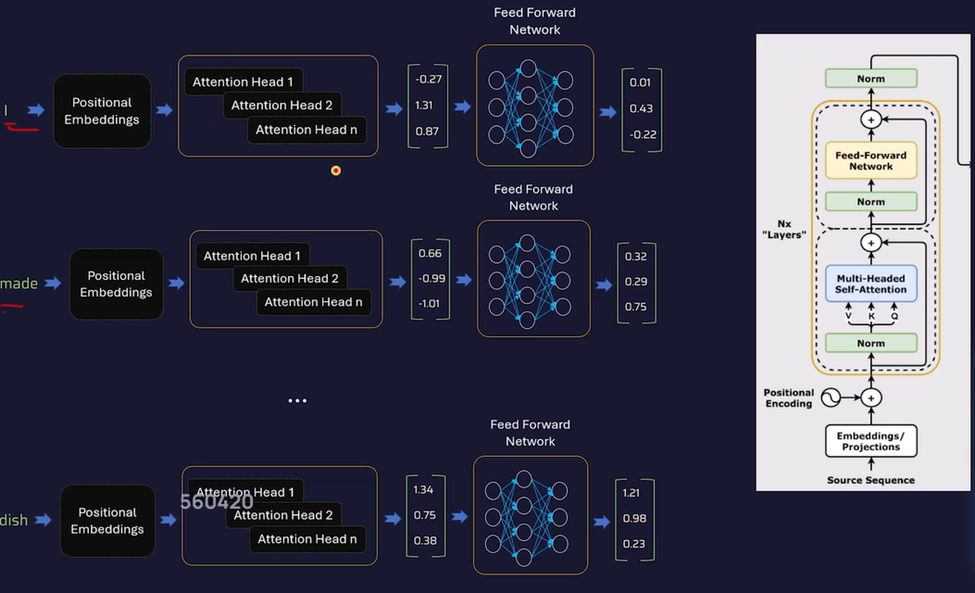

#### 12.7: Multi Headed Attention
- Flow: I made sweet indian rice called Kheer -> Positional Embedding -> Attention Head (Wq - Query Vector, Wk - Key Vector, Wv - Value Vector) -> Context Aware Embedding.
- The purpose of multiple attention heads is to allow the model to focus on different aspects or types of relationships between tokens (e.g., semantic, positional, syntactic) simultaneously, enriching the contextual understanding of each token.
- The Feed-Forward Network (FFN) enriches each token's embedding by applying non-linear transformations independently, enabling the model to capture complex patterns and higher-order features beyond contextual relationships.
- Normalization layer ensures stable learning improving the gradient flow.
- Multi-headed attention enables Transformers to capture diverse relationships in the data by learning multiple attention patterns simultaneously.
- Each attention head computes self-attention independently, focusing on different parts of the input sequence.
- Outputs from all heads are concatenated and transformed to create a richer representation of the input.
- Multi-headed attention improves the model's ability to understand complex patterns and long-range dependencies.
- It is a key component in Transformer Architecture.

#### 12.8: Decoder
- Output of encoder is contextual embedding.
- The decoder in Transformer architecture generates the output sequence step-by-step, one token at a time.
- It uses masked self-attention to ensure predictions depend only on previously generated tokens.
- The decoder integrates encoder outputs through cross-attention to incorporate contextual information from the input sequence.
- Fully connected layers in the decoder refine the processed information for final token prediction.
- The decoder is central to tasks like language translation and text generation, where sequential output is crucial.
- Below is the link to visually understand the Transformer Achitecture,
  - https://poloclub.github.io/transformer-explainer/

#### 12.9: How Transformers are trained ?
- Based on previous word predicting the next word is called `Casual Language Modeling` (CLM). GPT is trained using CLM.
- `Masked Language Modeling` (MLM): We take many words and mask some (ex: 15% is masked) tokens (words). It is bidirectional in nature. BERT (Google) is trained using MLM.
- In Self-supervised learning, labels are generated from the data itself without requiring manual annotations.
- Casual Language Modeling (CLM) and Mask Language Modeling (MLM) are self-supervised learning approaches used to train transformers.

#### 12.10: Hugging face - BERT Basics

In [1]:
from transformers import BertTokenizer, BertModel

In [2]:
# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [3]:
tokens = tokenizer("I love apple", return_tensors='pt')
tokens

{'input_ids': tensor([[ 101, 1045, 2293, 6207,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [5]:
# Padding
tokens = tokenizer(["I love apple", "you are what you eat"], padding=True,truncation=True, return_tensors='pt')
tokens

{'input_ids': tensor([[ 101, 1045, 2293, 6207,  102,    0,    0],
        [ 101, 2017, 2024, 2054, 2017, 4521,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1]])}

In [6]:
tokens = tokenizer(["I love apple", "you are what you eat"], padding="max_length", max_length=5, truncation=True, return_tensors='pt')
tokens

{'input_ids': tensor([[ 101, 1045, 2293, 6207,  102],
        [ 101, 2017, 2024, 2054,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]])}

In [7]:
tokens = tokenizer("I love apple", return_tensors='pt')
tokens

{'input_ids': tensor([[ 101, 1045, 2293, 6207,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [8]:
tokenizer.convert_ids_to_tokens(tokens['input_ids'][0])

['[CLS]', 'i', 'love', 'apple', '[SEP]']

##### Contextual Embeddings

In [9]:
model = BertModel.from_pretrained("bert-base-uncased")
output = model(**tokens)

C:\Users\sweanand\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [11]:
output['last_hidden_state']

tensor([[[ 0.0348,  0.2395, -0.0695,  ..., -0.1550,  0.0836,  0.0415],
         [ 0.0349,  0.4142,  0.0838,  ..., -0.2773,  0.4387,  0.0628],
         [ 0.8292,  0.8872,  0.7468,  ..., -0.0368,  0.1503, -0.1132],
         [-0.4576, -0.0591, -0.6812,  ...,  0.8809,  0.1841, -0.6385],
         [ 0.7952,  0.2601, -0.1495,  ..., -0.3544, -0.5979, -0.4172]]],
       grad_fn=<NativeLayerNormBackward0>)

In [12]:
output['last_hidden_state'].shape

torch.Size([1, 5, 768])

In [13]:
output['pooler_output'].shape

torch.Size([1, 768])

#### 12.11: Hugging Face - Spam Classification using BERT 

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertModel
#from datasets import load_dataset
import numpy as np
import pandas as pd

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [18]:
# Data Load
df = pd.read_csv("../../data/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.Category = df.Category.map({'ham':0, 'spam': 1})
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.Category.value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

In [25]:
df_spam = df[df.Category==1]
df_spam.shape

(747, 2)

In [22]:
df_ham_small = df[df.Category==0].sample(1000)
df_ham_small.shape

(1000, 2)

In [23]:
df_small = pd.concat([df_spam, df_ham_small])
df_small.Category.value_counts()

Category
0    1000
1     747
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_small.Message,df_small.Category, test_size=0.2, random_state=5)

In [26]:
y_train[:4]

3642    1
2547    0
859     0
19      1
Name: Category, dtype: int64

In [27]:
y_train.value_counts()

Category
0    789
1    608
Name: count, dtype: int64

In [28]:
y_test.value_counts()

Category
0    211
1    139
Name: count, dtype: int64

##### Tokenization

In [29]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(texts, labels):
    encodings = tokenizer(texts, padding='max_length', max_length=128, truncation=True, return_tensors='pt')
    return encodings['input_ids'], encodings['attention_mask'], torch.tensor(labels, dtype=torch.float)

tokenize_function(["Hurry up, click here", "I will see you tomorrow"], [1,0])

(tensor([[  101,  9241,  2039,  1010, 11562,  2182,   102,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,   

In [30]:
X_train.values.tolist()[:2]

['You can stop further club tones by replying "STOP MIX" See my-tone.com/enjoy. html for terms. Club tones cost GBP4.50/week. MFL, PO Box 1146 MK45 2WT (2/3)',
 'Company is very good.environment is terrific and food is really nice:)']

In [31]:
y_train.head(3)

3642    1
2547    0
859     0
Name: Category, dtype: int64

In [32]:
train_input_ids, train_attention_mask, train_labels = tokenize_function(X_train.values.tolist(), y_train.values.tolist())
val_input_ids, val_attention_mask, val_labels = tokenize_function(X_test.values.tolist(), y_test.values.tolist())

In [33]:
train_dataset = torch.utils.data.TensorDataset(train_input_ids, train_attention_mask, train_labels)
val_dataset = torch.utils.data.TensorDataset(val_input_ids, val_attention_mask, val_labels)

In [34]:
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [35]:
bert = BertModel.from_pretrained('bert-base-uncased')
bert.config.hidden_size

768

##### Define Model

In [38]:
class SentimentClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        
        for param in self.bert.parameters():
            param.requires_grad = False # Freeze all BERT layers
        
        self.classifier = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sentence_embedding = bert_output.last_hidden_state[:,0,:]
        return self.classifier(sentence_embedding)

In [39]:
model = SentimentClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

model = model.to(device)
criterion = criterion.to(device)

##### Training

In [40]:
epochs = 1

# Training loop
for epoch in range(epochs):
    model.train()
    total_train_loss = 0

    for batch, (input_ids, attention_mask, labels) in enumerate(train_loader):
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device, dtype=torch.float)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        print(f"Batch: {batch}, Epoch: {epoch}, Loss:  {loss.item():0.2f}")
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss}')

Batch: 0, Epoch: 0, Loss:  0.71
Batch: 1, Epoch: 0, Loss:  0.66
Batch: 2, Epoch: 0, Loss:  0.58
Batch: 3, Epoch: 0, Loss:  0.53
Batch: 4, Epoch: 0, Loss:  0.47
Batch: 5, Epoch: 0, Loss:  0.40
Batch: 6, Epoch: 0, Loss:  0.34
Batch: 7, Epoch: 0, Loss:  0.33
Batch: 8, Epoch: 0, Loss:  0.34
Batch: 9, Epoch: 0, Loss:  0.24
Batch: 10, Epoch: 0, Loss:  0.23
Batch: 11, Epoch: 0, Loss:  0.20
Batch: 12, Epoch: 0, Loss:  0.15
Batch: 13, Epoch: 0, Loss:  0.18
Batch: 14, Epoch: 0, Loss:  0.22
Batch: 15, Epoch: 0, Loss:  0.13
Batch: 16, Epoch: 0, Loss:  0.11
Batch: 17, Epoch: 0, Loss:  0.15
Batch: 18, Epoch: 0, Loss:  0.24
Batch: 19, Epoch: 0, Loss:  0.11
Batch: 20, Epoch: 0, Loss:  0.09
Batch: 21, Epoch: 0, Loss:  0.06
Epoch 1/1, Training Loss: 0.29342122308232566


##### Evaluation

In [42]:
# Evaluation
model.eval()
total_val_loss = 0
correct_predictions = 0

with torch.no_grad():
    for input_ids, attention_mask, labels in val_loader:
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device, dtype=torch.float)

        outputs = model(input_ids, attention_mask).squeeze()
        loss = criterion(outputs, labels.view_as(outputs))
        total_val_loss += loss.item()

        preds = (outputs > 0.5).float()
        correct_predictions += torch.sum(preds == labels)
        
avg_val_loss = total_val_loss / len(val_loader)
val_accuracy = correct_predictions.double() / len(val_dataset)
print(f'Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy:.4f}')        

Validation Loss: 0.09777536056935787, Validation Accuracy: 0.9714


##### Inference

In [43]:
def predict(model, text, max_length=128):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    
    # Tokenize input text
    encoding = tokenizer(
        text,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    model = model.to(device)
    model.eval()
    with torch.no_grad():
        output = model(input_ids, attention_mask).squeeze()
        prediction = (output > 0.5).float().item()
        return 'spam' if prediction == 1 else 'ham'

In [44]:
predict(model, "This is your last chance to WIN cash. Click this link")

'spam'

In [46]:
predict(model, "Dear Swetank, I hope to see you on Monday")

'ham'

#### 12.12: Hugging Face - Next Word Prediction Using GPT2

##### Transformers pipeline

In [47]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Happiness lies within and", max_length=30, num_return_sequences=5)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

C:\Users\sweanand\AppData\Local\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sweanand\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. 

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Happiness lies within and apart from our personal and professional lives. We are all people.\n\nAnd if you think that there's one thing we can all do, get together and get married, then we're not talking about that. We're talking about what we want.\n\nAs one of the leading women's groups in Canada, Women's Resource Centre says, that's why we're here, and why our message is, 'All that matters is what we say.' And what they say is, 'We're here to make change.'"},
 {'generated_text': 'Happiness lies within and within itself, and in this form of happiness there is no contradiction between man and woman, and no contradiction between God and man, or between man and society. It is so that there would be no contradiction between man and the world, and no contradiction between man and the universe. But that is not how it is in itself.\n\nAnd God is always right.\n\nThe very thing you have to believe in is not what God says about you or what he says about you, but what he s

##### GPT2 Tokenizer

In [48]:
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

prompt = "Apollo 11 was the first crewed"
inputs = tokenizer(prompt, return_tensors='pt')
inputs

{'input_ids': tensor([[25189, 15578,  1367,   373,   262,   717,  5462,   276]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [49]:
tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

['Ap', 'ollo', 'Ġ11', 'Ġwas', 'Ġthe', 'Ġfirst', 'Ġcrew', 'ed']

##### GPT2  Model for Next Word Prediction

In [50]:
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel.from_pretrained('gpt2')
outputs = model(**inputs)

In [51]:
logits = outputs.logits
logits.shape

torch.Size([1, 8, 50257])

In [52]:
last_token_logits = logits[:, -1, :]
last_token_logits 

tensor([[-111.3246, -110.2130, -117.3253,  ..., -121.1637, -116.9986,
         -111.5559]], grad_fn=<SliceBackward0>)

In [53]:
next_token_id = torch.argmax(last_token_logits).item()
next_token_id

4365

In [54]:
tokenizer.decode(next_token_id)

' mission'

#### MCQ
- What is a key feature of multi-headed attention in Transformers ?
  - It allows Transformers to capture multiple attention patterns simultaneously.
- What does the attention mechanism in Transformers allow ?
  - To focus on relevant parts of the input sequence for each output.
- What is the main purpose of BERT in NLP ?
- What is the main purpose of word embeddings in NLP ?
  - To represent a word in a numeric format capturing its semantic meaning.
- What is the main function of the decoder in Transformer models ?
  - To generate the output sequence step-by-step.
- Which of the following is a popular technique for creating static word embeddings ?
  - Word2vec
- What is the purpose of the encoder in Transformer architecture?
  - To generate a contextual embedding for each word (token).